In [1]:
import pandas as pd

In [3]:
df_data = pd.read_csv("supermarket_sales.csv")

In [5]:
df_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## 1-Coletar o faturamento por filial ou city?

In [11]:
df_data.groupby("City")['Total'].sum()

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

In [13]:
df_data.groupby("City")[['Total', 'gross income']].sum()

,Total,gross income
City,,
Mandalay,106197.6720,5057.0320
Naypyitaw,110568.7065,5265.1765
Yangon,106200.3705,5057.1605


##### Gross Income = rendimento bruto

## 2- Percentual de participação na receita de cada tipo de produto

In [34]:
df_data.groupby("Product line")["Total"].sum() / df_data.groupby("Product line")["Total"].sum() .sum()

Product line
Electronic accessories    0.168245
Fashion accessories       0.168147
Food and beverages        0.173841
Health and beauty         0.152318
Home and lifestyle        0.166772
Sports and travel         0.170676
Name: Total, dtype: float64

In [36]:
(df_data.groupby("Product line")["Total"].sum() / df_data.groupby("Product line")["Total"].sum() .sum()).sort_values()

Product line
Health and beauty         0.152318
Home and lifestyle        0.166772
Fashion accessories       0.168147
Electronic accessories    0.168245
Sports and travel         0.170676
Food and beverages        0.173841
Name: Total, dtype: float64

Ordenei do menor pro maior 

In [39]:
(df_data.groupby("Product line")["Total"].sum() / df_data.groupby("Product line")["Total"].sum() .sum()).sort_values() * 100

Product line
Health and beauty         15.231828
Home and lifestyle        16.677232
Fashion accessories       16.814702
Electronic accessories    16.824497
Sports and travel         17.067648
Food and beverages        17.384094
Name: Total, dtype: float64

In [49]:
percent_values = (
    df_data.groupby("Product line")["Total"].sum() 
    / df_data.groupby("Product line")["Total"].sum().sum()
).sort_values() * 100
percent_values = percent_values.round(2).astype(str) + '%' #Agora se tornou uma string não poderia fazer calculos

In [45]:
percent_values

Product line
Health and beauty         15.23%
Home and lifestyle        16.68%
Fashion accessories       16.81%
Electronic accessories    16.82%
Sports and travel         17.07%
Food and beverages        17.38%
Name: Total, dtype: object

## 3- Conseguimous ver a distribuição de consumo de produtos por gênero?

In [53]:
df_data.groupby(["Product line","Gender"])["Total"].sum()

Product line            Gender
Electronic accessories  Female    27102.0225
                        Male      27235.5090
Fashion accessories     Female    30437.4000
                        Male      23868.4950
Food and beverages      Female    33170.9175
                        Male      22973.9265
Health and beauty       Female    18560.9865
                        Male      30632.7525
Home and lifestyle      Female    30036.8775
                        Male      23825.0355
Sports and travel       Female    28574.7210
                        Male      26548.1055
Name: Total, dtype: float64

In [57]:
df_data.groupby(["Product line","Gender"])[["Total"]].sum()

Total
Product line           Gender            
Electronic accessories Female  27102.0225
                       Male    27235.5090
Fashion accessories    Female  30437.4000
                       Male    23868.4950
Food and beverages     Female  33170.9175
                       Male    22973.9265
Health and beauty      Female  18560.9865
                       Male    30632.7525
Home and lifestyle     Female  30036.8775
                       Male    23825.0355
Sports and travel      Female  28574.7210
                       Male    26548.1055

In [59]:
df_data.groupby(["Product line","Gender"])[["Total"]].sum().pivot_table(index = "Product line", columns = "Gender" )

Total            
Gender                      Female        Male
Product line                                  
Electronic accessories  27102.0225  27235.5090
Fashion accessories     30437.4000  23868.4950
Food and beverages      33170.9175  22973.9265
Health and beauty       18560.9865  30632.7525
Home and lifestyle      30036.8775  23825.0355
Sports and travel       28574.7210  26548.1055

## Qual faturamento por mês?

In [62]:
df_data['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [70]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [74]:
df_data['Month'] = df_data['Date'].apply(lambda x: x.month)
## Nâo curto muito em grande dataframes usar o apply com lambda pq acho menos performático

In [87]:
df_data['Month'] = df_data['Date'].dt.month
df_data['Year'] = df_data['Date'].dt.year 

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: Year, Length: 1000, dtype: int32

In [128]:
df_data.groupby(["Month"])["Total"].sum()

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

## Qual a média de avaliação por filial em janeiro de 2019?

In [93]:
df_data[(df_data['Year'] == 2019) & (df_data["Month"] == 1)]["Rating"].mean()

7.017613636363635

## Como foi distribuido o gasto por tipo de consumidor em cada filial?

In [96]:
df_data.groupby(["Customer type", "City"])["Total"].sum()

Customer type  City     
Member         Mandalay     53704.6860
               Naypyitaw    56881.2825
               Yangon       53637.4755
Normal         Mandalay     52492.9860
               Naypyitaw    53687.4240
               Yangon       52562.8950
Name: Total, dtype: float64

Esses valores não mostram uma grande variação entre os tipos de consumidores em cada cidade, o que pode indicar que os consumidores 
"Normal" e "Member" gastaram valores muito próximos em cada local.

### Análise Temporal de distribuição do gasto por consumidor

In [107]:
df_data['Month'] = df_data['Date'].dt.month
monthly_spend = df_data.groupby(['Month', 'Customer type', 'City'])['Total'].sum().unstack()
monthly_spend

City                   Mandalay   Naypyitaw      Yangon
Month Customer type                                    
1     Member         18568.7250  19148.0520  20198.0520
      Normal         18607.3335  21286.6290  18483.0765
2     Member         17156.9370  17165.7045  15973.4085
      Normal         17267.3340  15769.2780  13886.7120
3     Member         17979.0240  20567.5260  17466.0150
      Normal         16618.3185  16631.5170  20193.1065

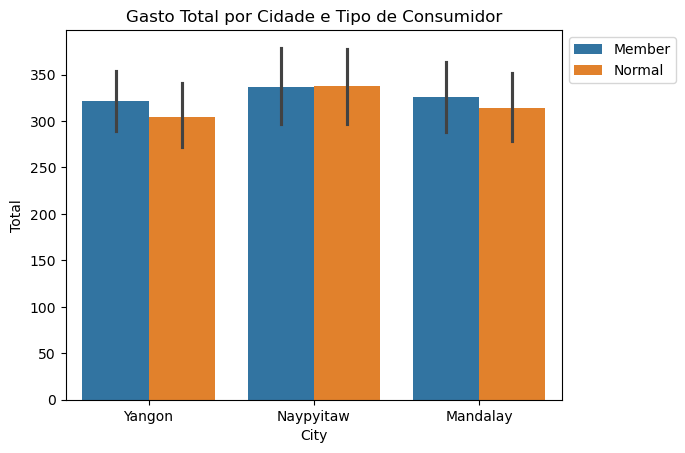

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df_data, x='City', y='Total', hue='Customer type')
plt.title('Gasto Total por Cidade e Tipo de Consumidor')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
